Running Explicit Euler Method...
Euler method execution time: 0.014829 seconds
Time steps: 1001
dt = 1.0 ms


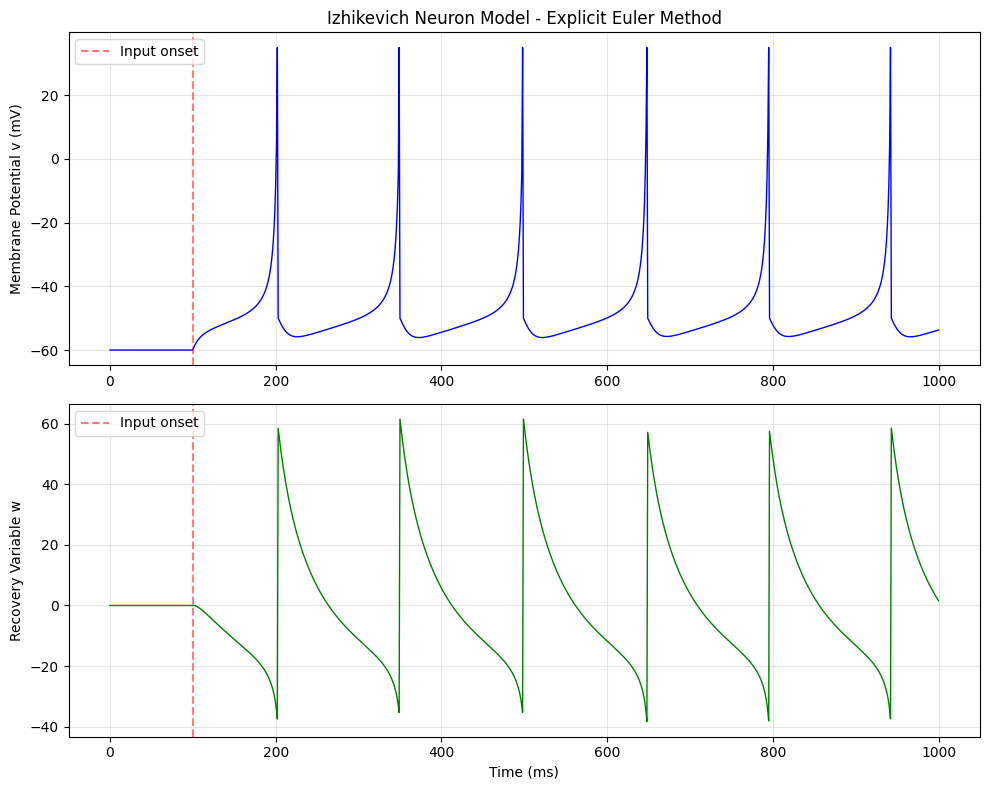


Simulation Statistics:
Total simulation time: 1000.0 ms
Number of spikes: 6
Final membrane potential: -53.70 mV
Final recovery variable: 1.56


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Izhikevich-like parameters
C = 100.0
vr = -60.0
vt = -40.0
k = 0.7
a = 0.03
b = -2.0
c = -50.0
d = 100.0
v_peak = 35.0

I0 = 70.0
t_switch = 100.0

def input_current(t):
    return I0 * (t >= t_switch)

def simulate_euler(dt, T_max):
    """
    Explicit Euler method for Izhikevich neuron model
    """
    n_steps = int(T_max/dt)
    t = np.linspace(0, T_max, n_steps+1)
    v = np.zeros_like(t)
    w = np.zeros_like(t)

    # Initial conditions
    v[0] = vr
    w[0] = 0.0

    for i in range(n_steps):
        I = input_current(t[i])

        # Compute derivatives at current time step
        dv = (k*(v[i]-vr)*(v[i]-vt) - w[i] + I) / C
        dw = a*(b*(v[i]-vr) - w[i])

        # Euler step: y_{n+1} = y_n + dt * f(t_n, y_n)
        v_next = v[i] + dt*dv
        w_next = w[i] + dt*dw

        # Handle spike reset
        if v_next >= v_peak:
            v[i] = v_peak  # Set current value to peak for plotting
            v_next = c     # Reset voltage
            w_next += d    # Add recovery variable increment

        v[i+1] = v_next
        w[i+1] = w_next

    return t, v, w

# Parameters
dt = 1.0
T_max = 1000.0

# Time the Euler method
print("Running Explicit Euler Method...")
start_time = time.time()
t_euler, v_euler, w_euler = simulate_euler(dt, T_max)
euler_time = time.time() - start_time

print(f"Euler method execution time: {euler_time:.6f} seconds")
print(f"Time steps: {len(t_euler)}")
print(f"dt = {dt} ms")

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(t_euler, v_euler, 'b-', linewidth=1)
ax1.set_ylabel('Membrane Potential v (mV)')
ax1.set_title('Izhikevich Neuron Model - Explicit Euler Method')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=t_switch, color='r', linestyle='--', alpha=0.5, label='Input onset')
ax1.legend()

ax2.plot(t_euler, w_euler, 'g-', linewidth=1)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Recovery Variable w')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=t_switch, color='r', linestyle='--', alpha=0.5, label='Input onset')
ax2.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"\nSimulation Statistics:")
print(f"Total simulation time: {T_max} ms")
print(f"Number of spikes: {np.sum(v_euler[:-1] >= v_peak)}")
print(f"Final membrane potential: {v_euler[-1]:.2f} mV")
print(f"Final recovery variable: {w_euler[-1]:.2f}")